# Questions:
    1.Load the file “zoo.data” and look at the info and first five rows. The first column denotes the animal name and the last one specifies a high-level class for the corresponding animal.
    2. Find out the unique number of high level class.
    3. Use the 16-intermediate feature and perform an agglomerative clustering.[ Hint: Refer to the agglomerative clustering module in scikit learn and set the number of clusters appropriately]
    4. Compute the mean squared error by comparing the actual class and predicted high level class.


In [1]:
import pandas as pd

In [2]:
import os
os.chdir(r'C:\Users\je638474\Documents\JJ\Folders\Udemy\Python EDUREKA')

In [3]:
data = pd.read_csv('zoo.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


[1 2 3 4 5 6 7]


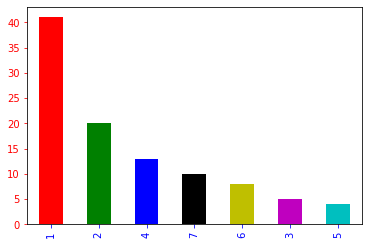

In [5]:
import numpy as np
labels = data['class_type']
print(np.unique(labels.values))

from matplotlib import pyplot as plot
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plot.subplots()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
(labels.value_counts()).plot(ax=ax, kind='bar',color=my_colors)
plt.show()

In [6]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
features=data.values[:,1:-1]

features.shape

(101, 16)

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

model = AgglomerativeClustering(n_clusters=7,
                                    linkage="average", affinity="cosine")

In [9]:
model.fit(features)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=7)

In [10]:
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int64)

In [11]:
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [12]:
labels = labels -1

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
score = mean_squared_error(labels,model.labels_)

In [15]:
abs_error = np.sqrt(score)
print(abs_error)

2.4373333911071624
